<a href="https://colab.research.google.com/github/Willlee0225/nbviewer/blob/master/%E6%B1%BA%E7%AD%96%E6%A8%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#coding=utf-8
import pandas as pd
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline

In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
import pandas as pd

In [0]:
ur1 = 'https://raw.githubusercontent.com/108102018/AIwork/master/data.csv'
data = pd.read_csv(ur1)

In [113]:
data

,Date,MMM,KO,CVX,CAT,BA,AXP,AAPL,XOM,WMT,WBA,VZ,UNH,TRV,PG,NIKE,MSFT,MRK,JPM,JNJ,INTC,IBM,HD,DIS,MCD,SP,NASDAQ,DOW,BP
0,1987/5/20,15.875000,2.437500,14.125000,6.375000,9.500000,8.239491,1.330357,10.921875,3.328125,2.171875,13.967607,0.183594,10.625000,5.515625,0.238281,0.380208,8.270833,13.208333,5.156250,0.869792,39.156250,0.663923,4.932500,6.270833,278.209991,406.600006,2215.870117,18.63
1,1987/5/21,15.781250,2.421875,14.156250,6.406250,9.500000,8.496975,1.330357,10.906250,3.453125,2.171875,13.827087,0.183594,10.687500,5.406250,0.242188,0.387153,8.375000,13.708333,5.164063,0.869792,39.312500,0.672154,5.014709,6.354167,280.170013,408.500000,2225.770020,18.45
2,1987/5/22,15.859375,2.492188,14.125000,6.437500,9.611111,8.529160,1.323661,10.843750,3.492188,2.171875,14.164333,0.183594,10.687500,5.500000,0.242188,0.375868,8.500000,13.916667,5.187500,0.830729,39.156250,0.674897,5.024984,6.552083,282.160004,407.399994,2243.199951,18.55
3,1987/5/26,16.156250,2.609375,14.312500,6.609375,9.694445,9.011943,1.392857,10.984375,3.562500,2.210938,14.445372,0.187500,11.000000,5.773438,0.242188,0.380208,8.479167,14.375000,5.289063,0.885417,40.156250,0.688615,5.220229,6.718750,289.109985,411.399994,2297.939941,18.63
4,1987/5/27,16.187500,2.578125,14.343750,6.734375,10.055555,8.915386,1.419643,10.937500,3.593750,2.226563,14.726410,0.183594,11.062500,5.710938,0.246094,0.380208,8.583333,14.000000,5.273438,0.885417,40.250000,0.732510,5.261333,6.708333,288.730011,412.600006,2295.810059,18.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2011/2/28,92.230003,31.959999,103.750000,102.930000,72.010002,43.570000,50.458572,85.529999,51.980000,43.340000,36.919998,42.580002,59.930000,63.049999,22.257500,26.580000,32.570000,46.689999,61.439999,21.469999,161.880005,37.470001,43.740002,75.680000,1327.219971,2782.270020,12226.339840,116.14
5996,2011/3/1,90.459999,32.455002,102.900002,99.860001,70.120003,43.150002,49.901428,84.800003,52.070000,42.720001,36.020000,42.450001,59.220001,62.740002,21.924999,26.160000,32.459999,45.599998,60.700001,21.389999,159.970001,36.759998,42.990002,74.889999,1306.329956,2737.409912,12058.019530,118.43
5997,2011/3/2,91.320000,32.215000,103.470001,100.970001,69.570000,43.020000,50.302856,85.080002,51.970001,41.840000,36.340000,43.560001,58.810001,62.410000,22.082500,26.080000,32.580002,45.209999,60.810001,21.490000,160.160004,36.660000,43.290001,74.690002,1308.439941,2748.070068,12066.799810,119.95
5998,2011/3/3,92.809998,32.785000,104.190002,104.250000,71.709999,44.299999,51.365715,85.820000,52.009998,42.529999,36.360001,44.790001,59.049999,62.549999,22.459999,26.200001,33.099998,46.080002,61.049999,21.790001,163.479996,37.549999,44.070000,76.239998,1330.969971,2798.739990,12258.200200,118.71


In [0]:
data['week_trend'] = np.where(data.DOW.shift(-5) > data.DOW, 1, 0)

In [115]:
data

,Date,MMM,KO,CVX,CAT,BA,AXP,AAPL,XOM,WMT,WBA,VZ,UNH,TRV,PG,NIKE,MSFT,MRK,JPM,JNJ,INTC,IBM,HD,DIS,MCD,SP,NASDAQ,DOW,BP,week_trend
0,1987/5/20,15.875000,2.437500,14.125000,6.375000,9.500000,8.239491,1.330357,10.921875,3.328125,2.171875,13.967607,0.183594,10.625000,5.515625,0.238281,0.380208,8.270833,13.208333,5.156250,0.869792,39.156250,0.663923,4.932500,6.270833,278.209991,406.600006,2215.870117,18.63,1
1,1987/5/21,15.781250,2.421875,14.156250,6.406250,9.500000,8.496975,1.330357,10.906250,3.453125,2.171875,13.827087,0.183594,10.687500,5.406250,0.242188,0.387153,8.375000,13.708333,5.164063,0.869792,39.312500,0.672154,5.014709,6.354167,280.170013,408.500000,2225.770020,18.45,1
2,1987/5/22,15.859375,2.492188,14.125000,6.437500,9.611111,8.529160,1.323661,10.843750,3.492188,2.171875,14.164333,0.183594,10.687500,5.500000,0.242188,0.375868,8.500000,13.916667,5.187500,0.830729,39.156250,0.674897,5.024984,6.552083,282.160004,407.399994,2243.199951,18.55,1
3,1987/5/26,16.156250,2.609375,14.312500,6.609375,9.694445,9.011943,1.392857,10.984375,3.562500,2.210938,14.445372,0.187500,11.000000,5.773438,0.242188,0.380208,8.479167,14.375000,5.289063,0.885417,40.156250,0.688615,5.220229,6.718750,289.109985,411.399994,2297.939941,18.63,0
4,1987/5/27,16.187500,2.578125,14.343750,6.734375,10.055555,8.915386,1.419643,10.937500,3.593750,2.226563,14.726410,0.183594,11.062500,5.710938,0.246094,0.380208,8.583333,14.000000,5.273438,0.885417,40.250000,0.732510,5.261333,6.708333,288.730011,412.600006,2295.810059,18.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2011/2/28,92.230003,31.959999,103.750000,102.930000,72.010002,43.570000,50.458572,85.529999,51.980000,43.340000,36.919998,42.580002,59.930000,63.049999,22.257500,26.580000,32.570000,46.689999,61.439999,21.469999,161.880005,37.470001,43.740002,75.680000,1327.219971,2782.270020,12226.339840,116.14,0
5996,2011/3/1,90.459999,32.455002,102.900002,99.860001,70.120003,43.150002,49.901428,84.800003,52.070000,42.720001,36.020000,42.450001,59.220001,62.740002,21.924999,26.160000,32.459999,45.599998,60.700001,21.389999,159.970001,36.759998,42.990002,74.889999,1306.329956,2737.409912,12058.019530,118.43,0
5997,2011/3/2,91.320000,32.215000,103.470001,100.970001,69.570000,43.020000,50.302856,85.080002,51.970001,41.840000,36.340000,43.560001,58.810001,62.410000,22.082500,26.080000,32.580002,45.209999,60.810001,21.490000,160.160004,36.660000,43.290001,74.690002,1308.439941,2748.070068,12066.799810,119.95,0
5998,2011/3/3,92.809998,32.785000,104.190002,104.250000,71.709999,44.299999,51.365715,85.820000,52.009998,42.529999,36.360001,44.790001,59.049999,62.549999,22.459999,26.200001,33.099998,46.080002,61.049999,21.790001,163.479996,37.549999,44.070000,76.239998,1330.969971,2798.739990,12258.200200,118.71,0


In [0]:
# 檢查資料有無缺值
data.isnull().sum()
# 最簡單的作法是把有缺值的資料整列拿掉
data = data.dropna()

In [0]:
ur2 = 'https://raw.githubusercontent.com/108102018/AIwork/master/test.csv'
data2 = pd.read_csv(ur2)

In [0]:
data2['week_trend'] = np.where(data2.DOW.shift(-5) > data2.DOW, 1, 0)

In [0]:
# 檢查資料有無缺值
data2.isnull().sum()
# 最簡單的作法是把有缺值的資料整列拿掉
data2 = data2.dropna()

In [120]:
data2

,Date,MMM,KO,CVX,CAT,BA,AXP,AAPL,XOM,WMT,WBA,VZ,UNH,TRV,PG,NIKE,MSFT,MRK,JPM,JNJ,INTC,IBM,HD,DIS,MCD,SP,NASDAQ,DOW,BP,week_trend
0,2011/3/7,92.400002,32.610001,103.010002,102.129997,70.879997,43.709999,50.765713,84.720001,52.020000,41.849998,36.009998,43.560001,58.959999,61.709999,22.230000,25.719999,32.830002,45.189999,60.400002,21.209999,159.929993,36.869999,43.020000,76.290001,1310.130005,2745.629883,12090.03027,120.350000,0
1,2011/3/8,93.750000,32.820000,103.769997,104.129997,72.040001,45.240002,50.822857,84.599998,52.439999,42.389999,36.480000,43.830002,59.060001,62.049999,22.297501,25.910000,32.980000,46.400002,60.709999,21.129999,162.279999,37.040001,43.200001,75.540001,1321.819946,2765.770020,12214.37988,114.670000,0
2,2011/3/9,93.169998,32.810001,102.139999,102.360001,72.089996,45.049999,50.352856,84.379997,52.669998,42.610001,36.650002,44.490002,59.400002,62.000000,22.237499,25.889999,33.290001,46.560001,60.400002,21.200001,165.860001,37.669998,43.119999,75.779999,1320.020020,2751.719971,12213.08984,114.690000,0
3,2011/3/10,90.010002,32.645000,99.080002,98.389999,71.290001,44.020000,49.524284,81.379997,52.650002,41.959999,36.400002,43.790001,58.520000,61.490002,22.045000,25.410000,32.900002,45.529999,59.610001,20.790001,162.020004,37.070000,42.470001,76.680000,1295.109985,2701.020020,11984.61035,113.740000,0
4,2011/3/11,91.610001,32.404999,99.930000,100.019997,71.639999,44.279999,50.284286,82.120003,52.590000,41.930000,35.849998,43.590000,58.880001,61.490002,21.792500,25.680000,32.730000,45.740002,59.689999,20.870001,162.429993,37.139999,42.930000,76.730003,1304.280029,2715.610107,12044.40039,112.210000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,2020/5/7,145.740005,44.599998,92.639999,107.290001,128.649994,86.730003,303.739990,44.240002,121.889999,40.660000,55.580002,285.000000,95.800003,112.169998,88.559998,183.600006,75.599998,91.209999,147.589996,59.169998,121.230003,229.449997,105.570000,181.119995,2881.189941,8979.660156,23875.89063,24.059999,0
2309,2020/5/8,148.509995,46.110001,95.470001,112.110001,133.440002,89.500000,310.130005,46.180000,122.940002,41.669998,57.000000,287.000000,97.339996,115.949997,90.459999,184.679993,76.400002,92.699997,148.699997,59.669998,122.989998,234.429993,109.160004,181.229996,2929.800049,9121.320313,24331.32031,24.030001,0
2310,2020/5/11,145.729996,45.540001,93.370003,108.610001,128.910004,85.330002,315.010010,45.740002,123.669998,41.709999,56.400002,288.690002,95.510002,115.309998,90.930000,186.740005,77.910004,89.970001,149.110001,60.130001,122.589996,236.559998,107.769997,180.880005,2930.189941,9192.339844,24221.99023,23.500000,0
2311,2020/5/12,141.520004,44.820000,91.099998,105.000000,125.220001,83.139999,311.410004,44.119999,123.779999,40.529999,55.459999,287.700012,93.959999,114.550003,88.260002,182.509995,77.190002,87.029999,147.139999,58.389999,120.260002,232.899994,104.559998,176.539993,2870.120117,9002.549805,23764.77930,23.059999,0


In [121]:
data

,Date,MMM,KO,CVX,CAT,BA,AXP,AAPL,XOM,WMT,WBA,VZ,UNH,TRV,PG,NIKE,MSFT,MRK,JPM,JNJ,INTC,IBM,HD,DIS,MCD,SP,NASDAQ,DOW,BP,week_trend
0,1987/5/20,15.875000,2.437500,14.125000,6.375000,9.500000,8.239491,1.330357,10.921875,3.328125,2.171875,13.967607,0.183594,10.625000,5.515625,0.238281,0.380208,8.270833,13.208333,5.156250,0.869792,39.156250,0.663923,4.932500,6.270833,278.209991,406.600006,2215.870117,18.63,1
1,1987/5/21,15.781250,2.421875,14.156250,6.406250,9.500000,8.496975,1.330357,10.906250,3.453125,2.171875,13.827087,0.183594,10.687500,5.406250,0.242188,0.387153,8.375000,13.708333,5.164063,0.869792,39.312500,0.672154,5.014709,6.354167,280.170013,408.500000,2225.770020,18.45,1
2,1987/5/22,15.859375,2.492188,14.125000,6.437500,9.611111,8.529160,1.323661,10.843750,3.492188,2.171875,14.164333,0.183594,10.687500,5.500000,0.242188,0.375868,8.500000,13.916667,5.187500,0.830729,39.156250,0.674897,5.024984,6.552083,282.160004,407.399994,2243.199951,18.55,1
3,1987/5/26,16.156250,2.609375,14.312500,6.609375,9.694445,9.011943,1.392857,10.984375,3.562500,2.210938,14.445372,0.187500,11.000000,5.773438,0.242188,0.380208,8.479167,14.375000,5.289063,0.885417,40.156250,0.688615,5.220229,6.718750,289.109985,411.399994,2297.939941,18.63,0
4,1987/5/27,16.187500,2.578125,14.343750,6.734375,10.055555,8.915386,1.419643,10.937500,3.593750,2.226563,14.726410,0.183594,11.062500,5.710938,0.246094,0.380208,8.583333,14.000000,5.273438,0.885417,40.250000,0.732510,5.261333,6.708333,288.730011,412.600006,2295.810059,18.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2011/2/28,92.230003,31.959999,103.750000,102.930000,72.010002,43.570000,50.458572,85.529999,51.980000,43.340000,36.919998,42.580002,59.930000,63.049999,22.257500,26.580000,32.570000,46.689999,61.439999,21.469999,161.880005,37.470001,43.740002,75.680000,1327.219971,2782.270020,12226.339840,116.14,0
5996,2011/3/1,90.459999,32.455002,102.900002,99.860001,70.120003,43.150002,49.901428,84.800003,52.070000,42.720001,36.020000,42.450001,59.220001,62.740002,21.924999,26.160000,32.459999,45.599998,60.700001,21.389999,159.970001,36.759998,42.990002,74.889999,1306.329956,2737.409912,12058.019530,118.43,0
5997,2011/3/2,91.320000,32.215000,103.470001,100.970001,69.570000,43.020000,50.302856,85.080002,51.970001,41.840000,36.340000,43.560001,58.810001,62.410000,22.082500,26.080000,32.580002,45.209999,60.810001,21.490000,160.160004,36.660000,43.290001,74.690002,1308.439941,2748.070068,12066.799810,119.95,0
5998,2011/3/3,92.809998,32.785000,104.190002,104.250000,71.709999,44.299999,51.365715,85.820000,52.009998,42.529999,36.360001,44.790001,59.049999,62.549999,22.459999,26.200001,33.099998,46.080002,61.049999,21.790001,163.479996,37.549999,44.070000,76.239998,1330.969971,2798.739990,12258.200200,118.71,0


In [0]:
data.drop(['Date'], axis=1, inplace=True)
data2.drop(['Date'], axis=1, inplace=True)


In [0]:
# 訓練樣本再分成目標序列 y 以及因子矩陣 X
train_X = data.drop('week_trend', axis = 1)
train_y = data.week_trend
# 測試樣本再分成目標序列 y 以及因子矩陣 X
test_X = data2.drop('week_trend', axis = 1)
test_y = data2.week_trend

In [124]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)


In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 7)

In [0]:
model.fit(train_X, train_y)
prediciton = model.predict(test_X)

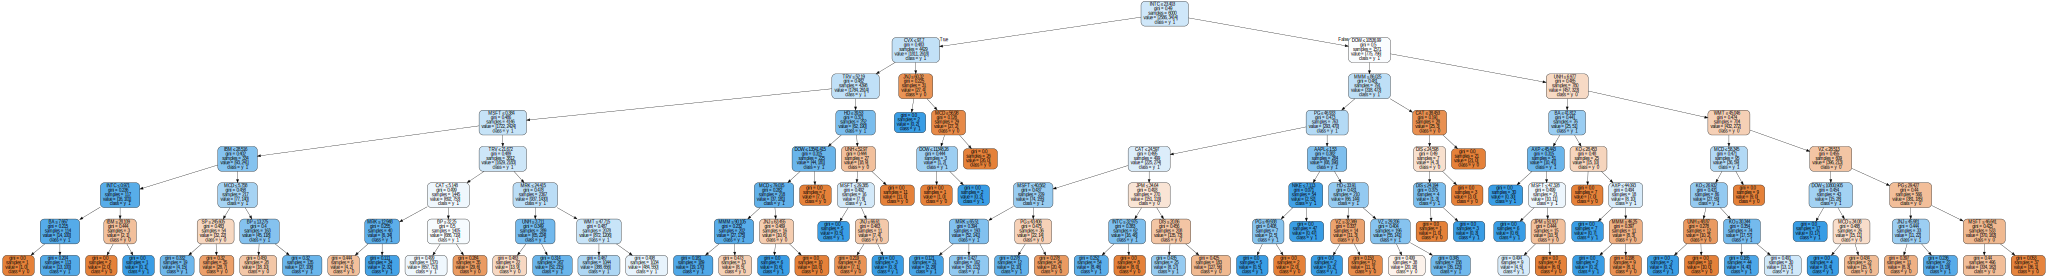

In [127]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(model, out_file = None,
                           feature_names = train_X.columns,
                           filled = True, rounded = True,
                           class_names = True,
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph

In [0]:
from sklearn.metrics import confusion_matrix


###（True跌）真實「跌」，而 A.I. 正確預測「跌」的次數一共 936 次
###（False漲）真實「跌」，但 A.I. 錯誤預測「漲」的次數一共 22 次
###（True漲）真實「漲」，而 A.I. 正確預測「漲」的次數一共 1313次
###（False跌）真實「漲」，但 A.I. 錯誤預測「跌」的次數一共 42次

In [129]:
confusion_matrix(test_y, prediciton)

array([[ 937,   21],
       [1313,   42]])

### 準確率 計算：（True跌 + True漲）/ 總樣本數

In [130]:
(936+1313)/data2.shape[0]

0.9723303069606571

## 第二種：ROC / AUC 分析

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, prediciton)

### AUC = 1：表示這個 A.I. 是完美的
### 0.5 < AUC < 1：表示這個 A.I. 相比隨機猜測來得優秀，妥善運用的話，能夠產生預測價值
### AUC = 0.5：表示這個 A.I. 做的預測跟隨機猜測一樣，沒有價值
### AUC < 0.5：表示這個 A.I. 做的預測比隨機猜測還差；但是！如果把這個 A.I. 當成反指標，將每次的預測結果反過來，就會優於隨機猜測

In [132]:
# 計算 AUC 面積
auc(false_positive_rate, true_positive_rate)

0.5045378209523222

In [0]:
import matplotlib.pyplot as plt
depth_parameters = np.arange(1, 50)
# 準備兩個容器，一個裝所有參數下的訓練階段 AUC；另一個裝所有參數下的測試階段 AUC
train_auc= []
test_auc = []

for test_depth in depth_parameters:
    # 根據該深度參數，創立一個決策樹模型，取名 temp_model
    temp_model = DecisionTreeClassifier(max_depth = test_depth)
    # 讓 temp_model 根據 train 學習樣本進行學習
    temp_model.fit(train_X, train_y)
    # 讓學習後的 temp_model 分別根據 train 學習樣本以及 test 測試樣本進行測驗
    train_predictions = temp_model.predict(train_X)
    test_predictions = temp_model.predict(test_X)
    # 計算學習樣本的 AUC，並且紀錄起來
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_predictions)
    auc_area = auc(false_positive_rate, true_positive_rate)
    train_auc.append(auc_area)
    # 計算測試樣本的 AUC，並且紀錄起來
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_predictions)
    auc_area = auc(false_positive_rate, true_positive_rate)
    test_auc.append(auc_area)

In [151]:
train_auc

[0.5,
 0.545689782892063,
 0.5530125714099308,
 0.5583903185599898,
 0.5747736561748606,
 0.5938625177887694,
 0.6138943370888534,
 0.6376691037450541,
 0.6703528666593269,
 0.6903969189239885,
 0.735724809947303,
 0.7731485068307514,
 0.7938918769037552,
 0.8198057133381449,
 0.8502719116181902,
 0.8763481746378022,
 0.9050929229581484,
 0.9286050206805062,
 0.9449819020085168,
 0.9526373592019757,
 0.9685157472234568,
 0.9756227598383617,
 0.9811296327256268,
 0.9869474267959011,
 0.9922905138796576,
 0.9946806992362551,
 0.9950140475209898,
 0.9964201588382491,
 0.9977267074160308,
 0.9983420934951891,
 0.998693451422218,
 0.9992266047950502,
 0.9997070884592854,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

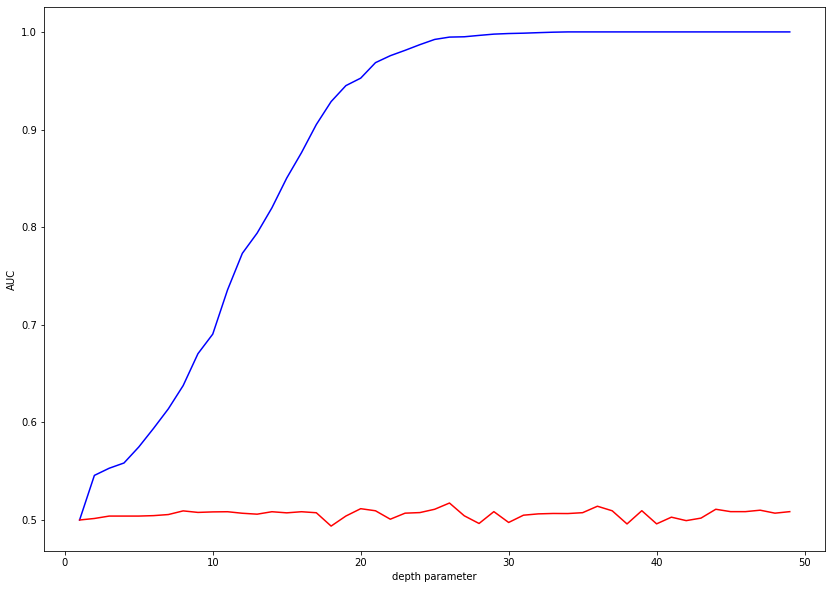

In [152]:

# 繪圖視覺化
plt.figure(figsize = (14,10))
plt.plot(depth_parameters, train_auc, 'b', label = 'Train AUC')
plt.plot(depth_parameters, test_auc, 'r', label = 'Test AUC')
plt.ylabel('AUC')
plt.xlabel('depth parameter')
plt.show()

### 深度參數設定在大約 20 的時候，模型已經根據學習樣本而過度擬合。它完美地解釋了過去（AUC = 1），但是該模型套用在測試樣本的時候，績效並沒有提昇。

#### 使用決策樹的話，假如不設定深度，該模型很容易『過度擬合』
#### 而過度擬合的模型，即使能完美解釋過去，卻不一定能夠預測未來，尤其是股市的預測

In [0]:
# test 是我們在切割樣本的時候，切出來的測試樣本，包含了價量資訊，我們首先將 A.I. 在這期間的預測結果 prediction 放進去
data2['prediciton'] = prediciton

# 這次的二元分類問題很單純，若直接把 prediction 位移一天，剛好就會是模擬買賣的狀況：
# T-1 日的預測為「跌」而 T 日的預測為「漲」，則 T+1 日開盤『買進』
# T-1 日的預測為「漲」而 T 日的預測為「跌」，則 T+1 日開盤『賣出』
# 連續預測「漲」，則『持續持有』
# 連續預測「跌」，則『空手等待』
data2['status'] = data2.prediciton.shift(1).fillna(0)


In [134]:
data2['buy_cost'] = data2.DOW[np.where((data2.status == 1) * (data2.status.shift(1) == 0))[0]]
# 同理，賣股票也很好找：status 從 1 變成 0 的時候，0 的那天的開盤賣出
data2['sell_cost'] = data2.DOW[np.where((data2.status == 0) * (data2.status.shift(1) == 1))[0]]
# 把缺值補上 0
test = data2.fillna(0)

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [0]:
buy_cost = np.array(test.buy_cost[test.buy_cost != 0])
sell_price = np.array(test.sell_cost[test.sell_cost != 0])


In [136]:
buy_cost 

array([12044.40039, 11444.61035, 10817.65039, 11139.29981, 11061.12012,
       10733.83008, 11518.84961, 11257.54981])

In [137]:
sell_price

array([12201.58984, 11405.92969, 11559.9502 , 11295.80957, 11509.08984,
       11416.29981, 11478.12988, 11555.62988])

In [0]:
trade_return = sell_price / buy_cost - 1

In [139]:
trade_return

array([ 0.01305083, -0.00337981,  0.06861932,  0.01405023,  0.04049949,
        0.06358119, -0.00353505,  0.02647824])

In [0]:
fee = 0.002
net_trade_return = trade_return - fee

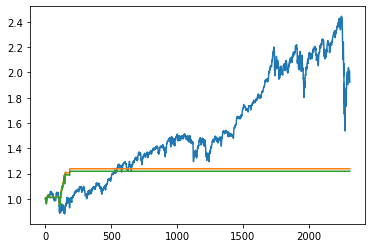

In [144]:
# 把報酬率都放進表格吧！
test['trade_ret'] = 0
test['net_trade_ret'] = 0
sell_dates = test.sell_cost[test.sell_cost != 0].index
test.loc[sell_dates, 'trade_ret'] = trade_return
test.loc[sell_dates, 'net_trade_ret'] = net_trade_return

# 如果還想要畫出績效走勢圖，那就要把策略的報酬率也算出來，由於我們不論買賣都是以開盤價進行，所以策略的報酬率會使用開盤價計算
test['open_ret'] = test.DOW / test.DOW.shift(1) - 1
test['strategy_ret'] = test.status.shift(1) * test.open_ret
test['strategy_net_ret'] = test.strategy_ret
test.loc[sell_dates, 'strategy_net_ret'] = test.loc[sell_dates, 'strategy_net_ret'] - fee
test = test.fillna(0)

# 計算出績效走勢圖
test['buy_and_hold_equity'] = (test.open_ret + 1).cumprod()
test['strategy_equity'] = (test.strategy_ret + 1).cumprod()
test['strategy_net_equity'] = (test.strategy_net_ret + 1).cumprod()

# 也畫出績效走勢看看吧！
test.buy_and_hold_equity.plot()
test.strategy_equity.plot()
test.strategy_net_equity.plot()